------------------------------
#### Learning curve

- using KNN on breast cancer dataset
----------------------------


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [12]:
np.linspace(.1, 1.0, 5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [13]:
# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
                                                            estimator, 
                                                            X, 
                                                            y, 
                                                            cv          = cv, 
                                                            n_jobs      = n_jobs, 
                                                            train_sizes = train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std  = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [14]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

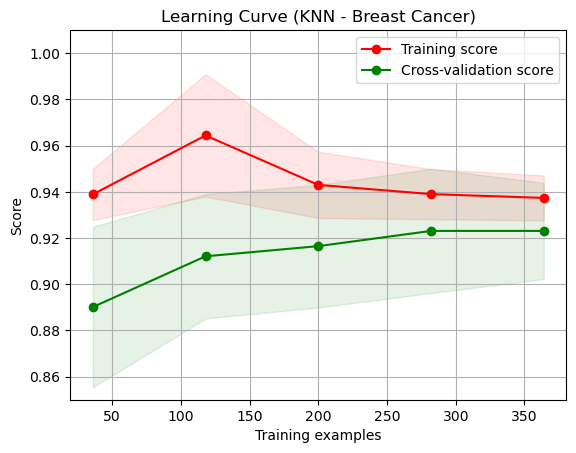

In [15]:
# Plot learning curves
plot_learning_curve(knn, "Learning Curve (KNN - Breast Cancer)", X_train, y_train, ylim=(0.85, 1.01), cv=5, n_jobs=-1)

plt.show()